Sklearn

In [2]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
from sklearn import preprocessing
import numpy as np
import csv
import os
import struct

In [3]:
def slice_the_set(df,start,end):

    start = int(len(df)*start/100)
    end = int(len(df)*end/100)

    return df.iloc[start:end]

In [43]:
df = pd.read_csv('../data/sliding01.csv')
le = preprocessing.LabelEncoder()
le.fit([ "A", "D", "H"])
df.loc[:,['result']]=le.transform(df['result'])

df_train = slice_the_set(df,0,80)
df_test = slice_the_set(df,80,100)

df_train

,Unnamed: 0,result,odds-home,odds-draw,odds-away,home-wins,home-draws,home-losses,home-goals,home-opposition-goals,away-wins,away-draws,away-losses,away-goals,away-opposition-goals
0,0,2,1.36,4.50,9.00,5,3,2,14,10,2,2,6,8,14
1,1,1,2.25,3.00,3.50,3,4,3,16,12,4,3,3,14,12
2,2,1,2.80,3.00,2.70,5,2,3,10,8,4,4,2,15,13
3,3,0,1.91,3.25,4.33,5,3,2,18,11,3,3,4,10,11
4,4,2,2.10,3.00,4.00,2,4,4,6,9,1,6,3,7,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16653,16653,2,1.44,4.50,6.50,4,2,4,17,12,1,2,7,6,21
16654,16654,2,1.29,5.75,8.50,4,4,2,15,15,0,2,8,5,28
16655,16655,1,2.55,3.50,2.60,2,4,4,12,19,4,2,4,16,15
16656,16656,0,3.10,3.60,2.15,3,5,2,21,13,9,1,0,29,7


In [44]:
y_train  = df_train['result']
X_train= df_train.iloc[:,2:-1]
y_test = df_test['result']
X_test = df_test.iloc[:,2:-1]

In [45]:
from scipy.special import softmax

In [62]:
#100,1000,3 -> 52,32

from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(52,32,3),
                   activation='logistic',
                   solver='sgd',
                   alpha=0.001,
                   batch_size=50,
                   learning_rate='constant',
#                   learning_rate='invscaling',
                   learning_rate_init=0.001,
#                   power_t=0.00001,
                   max_iter=1000,
                   verbose=True,
                   random_state=1)

nn.out_activation_ = 'softmax'

In [63]:
import datetime as dt
start = dt.datetime.now()
nn.fit(X_train, y_train)
end = dt.datetime.now()

Iteration 1, loss = 1.07687049
Iteration 2, loss = 1.06284759
Iteration 3, loss = 1.06254127
Iteration 4, loss = 1.06250378
Iteration 5, loss = 1.06239319
Iteration 6, loss = 1.06235672
Iteration 7, loss = 1.06230856
Iteration 8, loss = 1.06228360
Iteration 9, loss = 1.06222708
Iteration 10, loss = 1.06212661
Iteration 11, loss = 1.06206042
Iteration 12, loss = 1.06202320
Iteration 13, loss = 1.06192925
Iteration 14, loss = 1.06187858
Iteration 15, loss = 1.06178777
Iteration 16, loss = 1.06171628
Iteration 17, loss = 1.06158288
Iteration 18, loss = 1.06158168
Iteration 19, loss = 1.06150502
Iteration 20, loss = 1.06133822
Iteration 21, loss = 1.06126540
Iteration 22, loss = 1.06114903
Iteration 23, loss = 1.06101050
Iteration 24, loss = 1.06086437
Iteration 25, loss = 1.06072826
Iteration 26, loss = 1.06055083
Iteration 27, loss = 1.06035907
Iteration 28, loss = 1.06016244
Iteration 29, loss = 1.05999009
Iteration 30, loss = 1.05975420
Iteration 31, loss = 1.05949799
Iteration 32, los

In [64]:
print('It took {} to train the neural network'.format(end-start))

It took 0:00:23.674684 to train the neural network


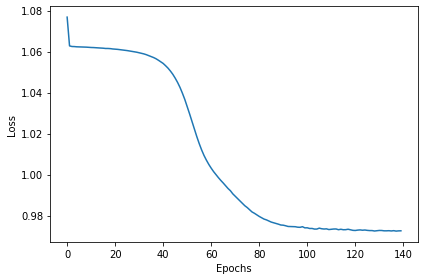

In [65]:
%matplotlib inline
loss_values = nn.loss_curve_
import matplotlib.pyplot as plt
plt.plot(range(len(loss_values)), loss_values)
# plt.plot(range(len(nn.loss_)), nn.loss_)
# plt.ylim([0, 2000])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.tight_layout()
# plt.savefig('./figures/cost.png', dpi=300)
plt.show()

In [66]:
y_test_pred = nn.predict(X_test)

acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]

print('Test accuracy: %.2f%%' % (acc * 100))

Test accuracy: 52.77%


In [67]:
y_train_pred = nn.predict(X_train)
acc = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]
print('Training accuracy: %.2f%%' % (acc * 100))

Training accuracy: 53.45%


In [13]:
df = pd.read_csv('../data/sliding02_shots.csv')
le = preprocessing.LabelEncoder()
le.fit([ "A", "D", "H"])
df.loc[:,['result']]=le.transform(df['result'])

df_train = slice_the_set(df,0,80)
df_test = slice_the_set(df,80,100)

df_train

,Unnamed: 0,result,odds-home,odds-draw,odds-away,home-wins,home-draws,home-losses,home-goals,home-opposition-goals,...,home-opposition_shots_on_target,away-wins,away-draws,away-losses,away-goals,away-opposition-goals,away-shots,away-shots_on_target,away-opposition_shots,away-opposition_shots_on_target
0,0,2,3.50,3.30,2.10,1,3,6,11,16,...,53,8,2,0,15,6,161,78,72,30
1,1,1,2.50,3.30,2.88,3,1,6,8,16,...,77,3,3,4,11,18,104,44,87,36
2,2,0,1.91,3.40,4.20,4,2,4,10,15,...,56,2,2,6,11,15,134,59,100,46
3,3,2,3.25,3.25,2.30,5,2,3,22,12,...,37,6,3,1,19,8,169,95,113,58
4,4,2,1.20,6.00,19.00,7,2,1,15,8,...,31,3,2,5,10,17,143,69,134,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5621,5621,0,2.20,3.40,3.30,1,3,6,11,21,...,62,3,1,6,11,15,106,51,93,54
5622,5622,1,3.40,3.30,2.20,3,1,6,8,12,...,94,3,3,4,10,13,110,48,124,60
5623,5623,2,1.22,6.50,13.00,6,4,0,20,6,...,38,2,3,5,9,14,123,61,93,51
5624,5624,2,2.30,3.20,3.30,2,2,6,10,16,...,69,2,4,4,11,10,103,46,125,55


In [14]:
y_train  = df_train['result']
X_train= df_train.iloc[:,2:-1]
y_test = df_test['result']
X_test = df_test.iloc[:,2:-1]

In [15]:
from scipy.special import softmax

In [68]:
#100,1000,3 -> 52,32

from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(52,32,3),
                   activation='logistic',
                   solver='sgd',
                   alpha=0.001,
                   batch_size=50,
                   learning_rate='constant',
#                   learning_rate='invscaling',
                   learning_rate_init=0.001,
#                   power_t=0.00001,
                   max_iter=1000,
                   verbose=True,
                   random_state=1)

nn.out_activation_ = 'softmax'

In [69]:
import datetime as dt
start = dt.datetime.now()
nn.fit(X_train, y_train)
end = dt.datetime.now()

Iteration 1, loss = 1.07687049
Iteration 2, loss = 1.06284759
Iteration 3, loss = 1.06254127
Iteration 4, loss = 1.06250378
Iteration 5, loss = 1.06239319
Iteration 6, loss = 1.06235672
Iteration 7, loss = 1.06230856
Iteration 8, loss = 1.06228360
Iteration 9, loss = 1.06222708
Iteration 10, loss = 1.06212661
Iteration 11, loss = 1.06206042
Iteration 12, loss = 1.06202320
Iteration 13, loss = 1.06192925
Iteration 14, loss = 1.06187858
Iteration 15, loss = 1.06178777
Iteration 16, loss = 1.06171628
Iteration 17, loss = 1.06158288
Iteration 18, loss = 1.06158168
Iteration 19, loss = 1.06150502
Iteration 20, loss = 1.06133822
Iteration 21, loss = 1.06126540
Iteration 22, loss = 1.06114903
Iteration 23, loss = 1.06101050
Iteration 24, loss = 1.06086437
Iteration 25, loss = 1.06072826
Iteration 26, loss = 1.06055083
Iteration 27, loss = 1.06035907
Iteration 28, loss = 1.06016244
Iteration 29, loss = 1.05999009
Iteration 30, loss = 1.05975420
Iteration 31, loss = 1.05949799
Iteration 32, los

In [70]:
print('It took {} to train the neural network'.format(end-start))

It took 0:00:30.147371 to train the neural network


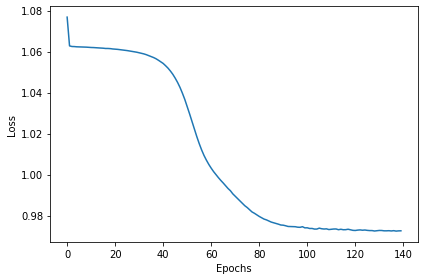

In [71]:
%matplotlib inline
loss_values = nn.loss_curve_
import matplotlib.pyplot as plt
plt.plot(range(len(loss_values)), loss_values)
# plt.plot(range(len(nn.loss_)), nn.loss_)
# plt.ylim([0, 2000])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.tight_layout()
# plt.savefig('./figures/cost.png', dpi=300)
plt.show()

In [72]:
y_test_pred = nn.predict(X_test)

acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]

print('Test accuracy: %.2f%%' % (acc * 100))

Test accuracy: 52.77%


In [73]:
y_train_pred = nn.predict(X_train)
acc = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]
print('Training accuracy: %.2f%%' % (acc * 100))

Training accuracy: 53.45%


In [74]:
df = pd.read_csv('../data/sliding03_shots_extra.csv')
le = preprocessing.LabelEncoder()
le.fit([ "A", "D", "H"])
df.loc[:,['result']]=le.transform(df['result'])

df_train = slice_the_set(df,0,80)
df_test = slice_the_set(df,80,100)

df_train

,Unnamed: 0,result,odds-home,odds-draw,odds-away,home-wins,home-draws,home-losses,home-goals,home-opposition-goals,...,away-opposition_shots,away-opposition_shots_on_target,home_shot_accuracy,home_shot_efficiency,home_opposition_shot_accuracy,home_opposition_shot_efficiency,away_shot_accuracy,away_shot_efficiency,away_opposition_shot_accuracy,away_opposition_shot_efficiency
0,0,2,3.50,3.30,2.10,1,3,6,11,16,...,72,30,0.489051,0.164179,0.452991,0.301887,0.484472,0.192308,0.416667,0.200000
1,1,1,2.50,3.30,2.88,3,1,6,8,16,...,87,36,0.477612,0.125000,0.509934,0.207792,0.423077,0.250000,0.413793,0.500000
2,2,0,1.91,3.40,4.20,4,2,4,10,15,...,100,46,0.483333,0.172414,0.451613,0.267857,0.440299,0.186441,0.460000,0.326087
3,3,2,3.25,3.25,2.30,5,2,3,22,12,...,113,58,0.463277,0.268293,0.500000,0.324324,0.562130,0.200000,0.513274,0.137931
4,4,2,1.20,6.00,19.00,7,2,1,15,8,...,134,69,0.447205,0.208333,0.418919,0.258065,0.482517,0.144928,0.514925,0.246377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5621,5621,0,2.20,3.40,3.30,1,3,6,11,21,...,93,54,0.570370,0.142857,0.521008,0.338710,0.481132,0.215686,0.580645,0.277778
5622,5622,1,3.40,3.30,2.20,3,1,6,8,12,...,124,60,0.469565,0.148148,0.510870,0.127660,0.436364,0.208333,0.483871,0.216667
5623,5623,2,1.22,6.50,13.00,6,4,0,20,6,...,93,51,0.461078,0.259740,0.404255,0.157895,0.495935,0.147541,0.548387,0.274510
5624,5624,2,2.30,3.20,3.30,2,2,6,10,16,...,125,55,0.423913,0.256410,0.472603,0.231884,0.446602,0.239130,0.440000,0.181818


In [75]:
y_train  = df_train['result']
X_train= df_train.iloc[:,2:-1]
y_test = df_test['result']
X_test = df_test.iloc[:,2:-1]

In [76]:
from scipy.special import softmax

In [94]:
#100,1000,3 -> 52,32

from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(62,32,3),
                   activation='logistic',
                   solver='sgd',
                   alpha=0.001,
                   batch_size=50,
                   learning_rate='constant',
#                   learning_rate='invscaling',
                   learning_rate_init=0.001,
#                   power_t=0.00001,
                   max_iter=1000,
                   verbose=True,
                   random_state=1)

nn.out_activation_ = 'softmax'

In [95]:
import datetime as dt
start = dt.datetime.now()
nn.fit(X_train, y_train)
end = dt.datetime.now()

Iteration 1, loss = 1.16604224
Iteration 2, loss = 1.07417999
Iteration 3, loss = 1.06225330
Iteration 4, loss = 1.06100663
Iteration 5, loss = 1.06084013
Iteration 6, loss = 1.06074041
Iteration 7, loss = 1.06063900
Iteration 8, loss = 1.06060579
Iteration 9, loss = 1.06053770
Iteration 10, loss = 1.06043286
Iteration 11, loss = 1.06051948
Iteration 12, loss = 1.06033257
Iteration 13, loss = 1.06025121
Iteration 14, loss = 1.06013606
Iteration 15, loss = 1.06014453
Iteration 16, loss = 1.06003333
Iteration 17, loss = 1.05996044
Iteration 18, loss = 1.05989520
Iteration 19, loss = 1.05980882
Iteration 20, loss = 1.05973181
Iteration 21, loss = 1.05961126
Iteration 22, loss = 1.05951476
Iteration 23, loss = 1.05948784
Iteration 24, loss = 1.05935521
Iteration 25, loss = 1.05922727
Iteration 26, loss = 1.05910655
Iteration 27, loss = 1.05904137
Iteration 28, loss = 1.05893037
Iteration 29, loss = 1.05882464
Iteration 30, loss = 1.05870250
Iteration 31, loss = 1.05859251
Iteration 32, los

In [96]:
print('It took {} to train the neural network'.format(end-start))

It took 0:00:14.113284 to train the neural network


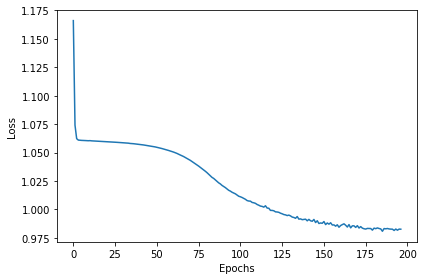

In [97]:
%matplotlib inline
loss_values = nn.loss_curve_
import matplotlib.pyplot as plt
plt.plot(range(len(loss_values)), loss_values)
# plt.plot(range(len(nn.loss_)), nn.loss_)
# plt.ylim([0, 2000])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.tight_layout()
# plt.savefig('./figures/cost.png', dpi=300)
plt.show()

In [98]:
y_test_pred = nn.predict(X_test)

acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]

print('Test accuracy: %.2f%%' % (acc * 100))

Test accuracy: 50.82%


In [99]:
y_train_pred = nn.predict(X_train)
acc = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]
print('Training accuracy: %.2f%%' % (acc * 100))

Training accuracy: 53.20%
